# Output.ipynb

This notebook contains detailed instructions on how to reproduce the results of this project.  Note, for detailed instructions on the scripts that are running in the following cells, please see the README.md in the appropriate directory for details.

## Prerequisites

In the following subsections, it is expected that the user has downloaded the neccessary data so that each python notebook or script in this project can be run.  The required prerequisites must section **must** be completed before proceeding further.  The optional prerequites are optional.  It will be noted below when it is required.  Note, when you execute `download_output.py` the outputs and results of each model are automatically downloaded.  This allows the user to execute **most** cells but not all (i.e. the user can skip running the actual models, but will need to download the models if they actually want to regenerate the results).

### Required

In [1]:
from IPython.display import Image
import shutil
import os

In [2]:
working_directory = os.getcwd()

In [2]:
# Install all requirements to run everything in this project
!pip install -r requirements.txt

In [2]:
# This script downloads and propagates the datafiles required to run each script
%run download_output.py

Downloading...
From (uriginal): https://drive.google.com/uc?id=1C4sxd3439a6lAoK5X3K-CfE1WmhcjsH2
From (redirected): https://drive.google.com/uc?id=1C4sxd3439a6lAoK5X3K-CfE1WmhcjsH2&confirm=t&uuid=698b8c5d-3dba-4912-8a36-c60880a92ae3
To: /home/aidan/Git-Repositories/nlpclass-1231-g-the_3rd_times_the_charm-group-project/output.zip
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 137M/137M [00:17<00:00, 7.76MB/s]


### Optional

In [4]:
# This script downloads the final models used in this project.  Note, depending on your internet speed this could take quite a while!
!python download_models.py

## Generating Training Data

The following cell allows the user to generate the training data used to train both models.

In [31]:
# Cleans the Sentiment140 dataset and outputs training_data_formulation/results/tweets.csv
os.chdir(f"{working_directory}/training_data_formulation")
!python clean_tweets.py

In [32]:
# Cleans the NewsMTSC dataset and outputs training_data_formulation/results/news.csv
os.chdir(f"{working_directory}/training_data_formulation")
!python clean_news.py

In [3]:
# Merges the training data and generates all the splits (i.e. train/test/validation etc_
os.chdir(f"{working_directory}/training_data_formulation")
!papermill data_formulation.ipynb /dev/null

# We copy all the resulting data splits to where they are used elsewhere in the project
os.chdir(f"{working_directory}")
shutil.copy("training_data_formulation/results/test_4000.csv", "bert/data/test_4000.csv")
shutil.copy("training_data_formulation/results/train_4000.csv", "bert/data/train_4000.csv")
shutil.copy("training_data_formulation/results/val_4000.csv", "bert/data/val_4000.csv")

shutil.copy("training_data_formulation/results/val_4000_news.csv", "bert/data/val_4000_news.csv")
shutil.copy("training_data_formulation/results/train_4000_news.csv", "bert/data/train_4000_news.csv")
shutil.copy("training_data_formulation/results/test_4000_news.csv", "bert/data/test_4000_news.csv")

shutil.copy("training_data_formulation/results/val_4000_tweets.csv", "bert/data/val_4000_tweets.csv")
shutil.copy("training_data_formulation/results/train_4000_tweets.csv", "bert/data/train_4000_tweets.csv")
shutil.copy("training_data_formulation/results/test_4000_tweets.csv", "bert/data/test_4000_tweets.csv")

shutil.copy("training_data_formulation/results/test_4000.csv", "lstm/data/test_4000.csv")
shutil.copy("training_data_formulation/results/train_4000.csv", "lstm/data/train_4000.csv")
shutil.copy("training_data_formulation/results/val_4000.csv", "lstm/data/val_4000.csv")

shutil.copy("training_data_formulation/results/val_4000_news.csv", "lstm/data/val_4000_news.csv")
shutil.copy("training_data_formulation/results/train_4000_news.csv", "lstm/data/train_4000_news.csv")
shutil.copy("training_data_formulation/results/test_4000_news.csv", "lstm/data/test_4000_news.csv")

shutil.copy("training_data_formulation/results/val_4000_tweets.csv", "lstm/data/val_4000_tweets.csv")
shutil.copy("training_data_formulation/results/train_4000_tweets.csv", "lstm/data/train_4000_tweets.csv")
shutil.copy("training_data_formulation/results/test_4000_tweets.csv", "lstm/data/test_4000_tweets.csv")


Input Notebook:  data_formulation.ipynb
Output Notebook: /dev/null
Executing:   0%|                                       | 0/79 [00:00<?, ?cell/s]/Users/anantsunilamawasthy/Documents/NLP/nlpclass-1231-g-the_3rd_times_the_charm-group-project/venv/lib/python3.10/site-packages/papermill/iorw.py:153: UserWarning: the file is not specified with any extension : null
  warnings.warn(
Executing notebook with kernel: python3
/Users/anantsunilamawasthy/Documents/NLP/nlpclass-1231-g-the_3rd_times_the_charm-group-project/venv/lib/python3.10/site-packages/papermill/iorw.py:153: UserWarning: the file is not specified with any extension : null
  warnings.warn(
Executing:  44%|█████████████▎                | 35/79 [00:04<00:01, 22.47cell/s]objc[19847]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x220c831a8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Ch

'lstm/data/test_4000_tweets.csv'

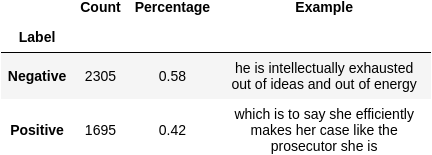

In [34]:
# Summary statistics of NewsMTSC data used in training data
os.chdir(f"{working_directory}/training_data_formulation")
Image(filename='results/news_stats.png')

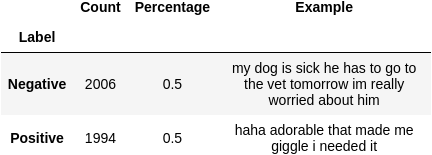

In [36]:
# Summary statistics of Sentiment140 data used in training data
os.chdir(f"{working_directory}/training_data_formulation")
Image(filename='results/tweets_stats.png')

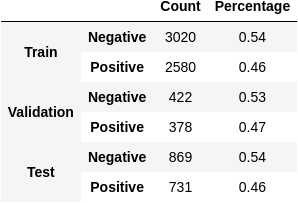

In [37]:
# Summary statistics of merged data used in trainng/validation/test splits
os.chdir(f"{working_directory}/training_data_formulation")
Image(filename='results/split_stats.png')

## Generating Bert Model Results

**Optional Prerequisites Required**

The following cell executes the `test.ipynb` notebook that executes the bert models on the training, vaidation and test datasets and produces a PNG of the results that is used in the final report.  The resulting PNG is shown below.  Note, actually running this could take quite a while (~ 10 minutes on an RTX 3090).  If you do not have an NVIDIA GPU with **at least** 8GB of vram, do not try and execute this, it will either take too long or you will get an out of memory error.

In [7]:
os.chdir(f"{working_directory}/bert")
!papermill test.ipynb /dev/null

Input Notebook:  test.ipynb
Output Notebook: /dev/null
Executing:   0%|                                       | 0/67 [00:00<?, ?cell/s]/home/aidan/Git-Repositories/nlpclass-1231-g-the_3rd_times_the_charm-group-project/venv/lib/python3.10/site-packages/papermill/iorw.py:153: UserWarning: the file is not specified with any extension : null
  warnings.warn(
Executing notebook with kernel: python3
/home/aidan/Git-Repositories/nlpclass-1231-g-the_3rd_times_the_charm-group-project/venv/lib/python3.10/site-packages/papermill/iorw.py:153: UserWarning: the file is not specified with any extension : null
  warnings.warn(
Executing:  21%|██████▎                       | 14/67 [00:06<00:14,  3.58cell/s]^C


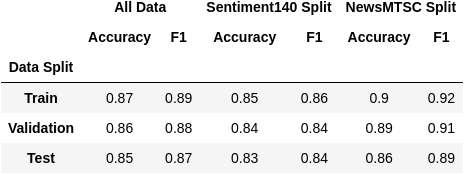

In [8]:
os.chdir(f"{working_directory}/bert")
Image(filename='results/bert_results_table.png')

## Generating LSTM Model Results

**Optional Prerequisites Required**

The following cell executes the LSTM model on the scraped data from Twitter and the New York Times.  This produces lstm/results/twitter_lstm_results.csv and lstm/results/nyt_lstm_results.csv.  These files are then moved to the result_visualizations/data directory and are used to produce the vizualizations. 

In [3]:
os.chdir(f"{working_directory}/lstm")
!papermill test.ipynb /dev/null

Input Notebook:  test.ipynb
Output Notebook: /dev/null
Executing:   0%|                                       | 0/12 [00:00<?, ?cell/s]/Users/anantsunilamawasthy/Documents/NLP/nlpclass-1231-g-the_3rd_times_the_charm-group-project/venv/lib/python3.10/site-packages/papermill/iorw.py:153: UserWarning: the file is not specified with any extension : null
  warnings.warn(
Executing notebook with kernel: python3
/Users/anantsunilamawasthy/Documents/NLP/nlpclass-1231-g-the_3rd_times_the_charm-group-project/venv/lib/python3.10/site-packages/papermill/iorw.py:153: UserWarning: the file is not specified with any extension : null
  warnings.warn(
Executing:  50%|███████████████▌               | 6/12 [00:15<00:14,  2.39s/cell]objc[8019]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x23c14b1a8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framewor

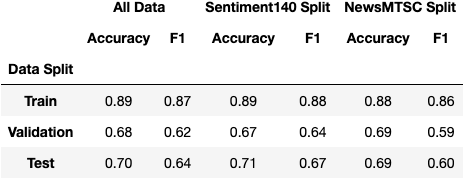

In [5]:
os.chdir(f"{working_directory}/lstm")
Image(filename='results/lstm_results_table.png')

## Model Results on Scraped Data

The following cells execute several scripts that allow the user to reproduce the results of both models on the scraped data from the New York Times and Twitter.

### Generating Results of the Bert Model

**Optional Prerequisites Required**

The following cell executes the BERT model on the scraped data from Twitter and the New York Times.  This produces `bert/results/twitter_bert_results.csv` and `bert/results/nyt_bert_results.csv`.  These files are then moved to the `result_visualizations/data` directory and are used to produce the vizualizations. Note, actually running this could take quite a while (~ 10 minutes on an RTX 3090).  If you do not have an NVIDIA GPU with **at least** 8GB of vram, do not try and execute this, it will either take too long or you will get an out of memory error.

In [14]:
os.chdir(f"{working_directory}/bert")
!papermill real_data_testing.ipynb /dev/null

[Errno 2] No such file or directory: './bert'
/home/aidan/Git-Repositories/nlpclass-1231-g-the_3rd_times_the_charm-group-project/bert
Input Notebook:  real_data_testing.ipynb
Output Notebook: /dev/null
Executing:   0%|                                       | 0/36 [00:00<?, ?cell/s]/home/aidan/Git-Repositories/nlpclass-1231-g-the_3rd_times_the_charm-group-project/venv/lib/python3.10/site-packages/papermill/iorw.py:153: UserWarning: the file is not specified with any extension : null
  warnings.warn(
Executing notebook with kernel: python3
/home/aidan/Git-Repositories/nlpclass-1231-g-the_3rd_times_the_charm-group-project/venv/lib/python3.10/site-packages/papermill/iorw.py:153: UserWarning: the file is not specified with any extension : null
  warnings.warn(
Executing:  89%|██████████████████████████▋   | 32/36 [03:06<00:51, 12.84s/cell]

In [11]:
os.chdir(f"{working_directory}")
shutil.copy("bert/results/twitter_bert_results.csv", "result_visualizations/data/twitter_bert_results.csv")
shutil.copy("bert/results/nyt_bert_results.csv", "result_visualizations/data/nyt_bert_results.csv")

'result_visualizations/data/nyt_bert_results.csv'

### Generating Results of the LSTM Model

**Optional Prerequisites Required**

The following cell executes the LSTM model on the scraped data from Twitter and the New York Times. This produces lstm/results/twitter_lstm_results.csv and lstm/results/nyt_lstm_results.csv. These files are then moved to the result_visualizations/data directory and are used to produce the vizualizations. 

In [8]:
os.chdir(f"{working_directory}/lstm")
!papermill real_data_lstm_testing.ipynb /dev/null

Input Notebook:  real_data_lstm_testing.ipynb
Output Notebook: /dev/null
Executing:   0%|                                       | 0/13 [00:00<?, ?cell/s]/Users/anantsunilamawasthy/Documents/NLP/nlpclass-1231-g-the_3rd_times_the_charm-group-project/venv/lib/python3.10/site-packages/papermill/iorw.py:153: UserWarning: the file is not specified with any extension : null
  warnings.warn(
Executing notebook with kernel: python3
/Users/anantsunilamawasthy/Documents/NLP/nlpclass-1231-g-the_3rd_times_the_charm-group-project/venv/lib/python3.10/site-packages/papermill/iorw.py:153: UserWarning: the file is not specified with any extension : null
  warnings.warn(
Executing: 100%|██████████████████████████████| 13/13 [00:29<00:00,  2.27s/cell]


In [9]:
os.chdir(f"{working_directory}")
shutil.copy("lstm/results/twitter_lstm_results.csv", "result_visualizations/data/twitter_lstm_results.csv")
shutil.copy("lstm/results/nyt_lstm_results.csv", "result_visualizations/data/nyt_lstm_results.csv")

'result_visualizations/data/nyt_lstm_results.csv'

### Generating Vizualizations the Results
The following cell generates the vizualizations of the results from the previous two sections.  The vizualizations are then shown in the subsequent cells

In [11]:
os.chdir(f"{working_directory}/result_visualizations")
!papermill viz.ipynb /dev/null

Input Notebook:  viz.ipynb
Output Notebook: /dev/null
Executing:   0%|                                       | 0/59 [00:00<?, ?cell/s]/Users/anantsunilamawasthy/Documents/NLP/nlpclass-1231-g-the_3rd_times_the_charm-group-project/venv/lib/python3.10/site-packages/papermill/iorw.py:153: UserWarning: the file is not specified with any extension : null
  warnings.warn(
Executing notebook with kernel: python3
/Users/anantsunilamawasthy/Documents/NLP/nlpclass-1231-g-the_3rd_times_the_charm-group-project/venv/lib/python3.10/site-packages/papermill/iorw.py:153: UserWarning: the file is not specified with any extension : null
  warnings.warn(
Executing:  39%|███████████▋                  | 23/59 [00:03<00:02, 14.80cell/s]objc[8821]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x23c14b1a8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework

#### Twitter Results

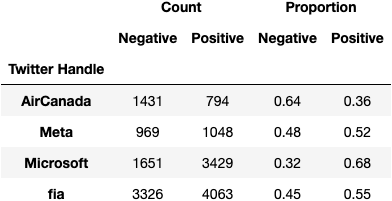

In [12]:
# Initial summary of LSTM model results on twitter data
os.chdir(f"{working_directory}/result_visualizations")
Image(filename='results/lstm_initial_twitter_summary_result.png')

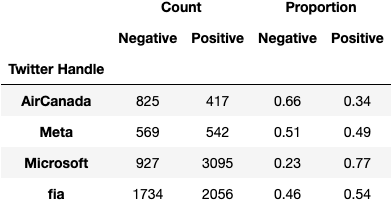

In [13]:
# Initial summary of BERT model results on twitter data
os.chdir(f"{working_directory}/result_visualizations")
Image(filename='results/bert_initial_twitter_summary_result.png')

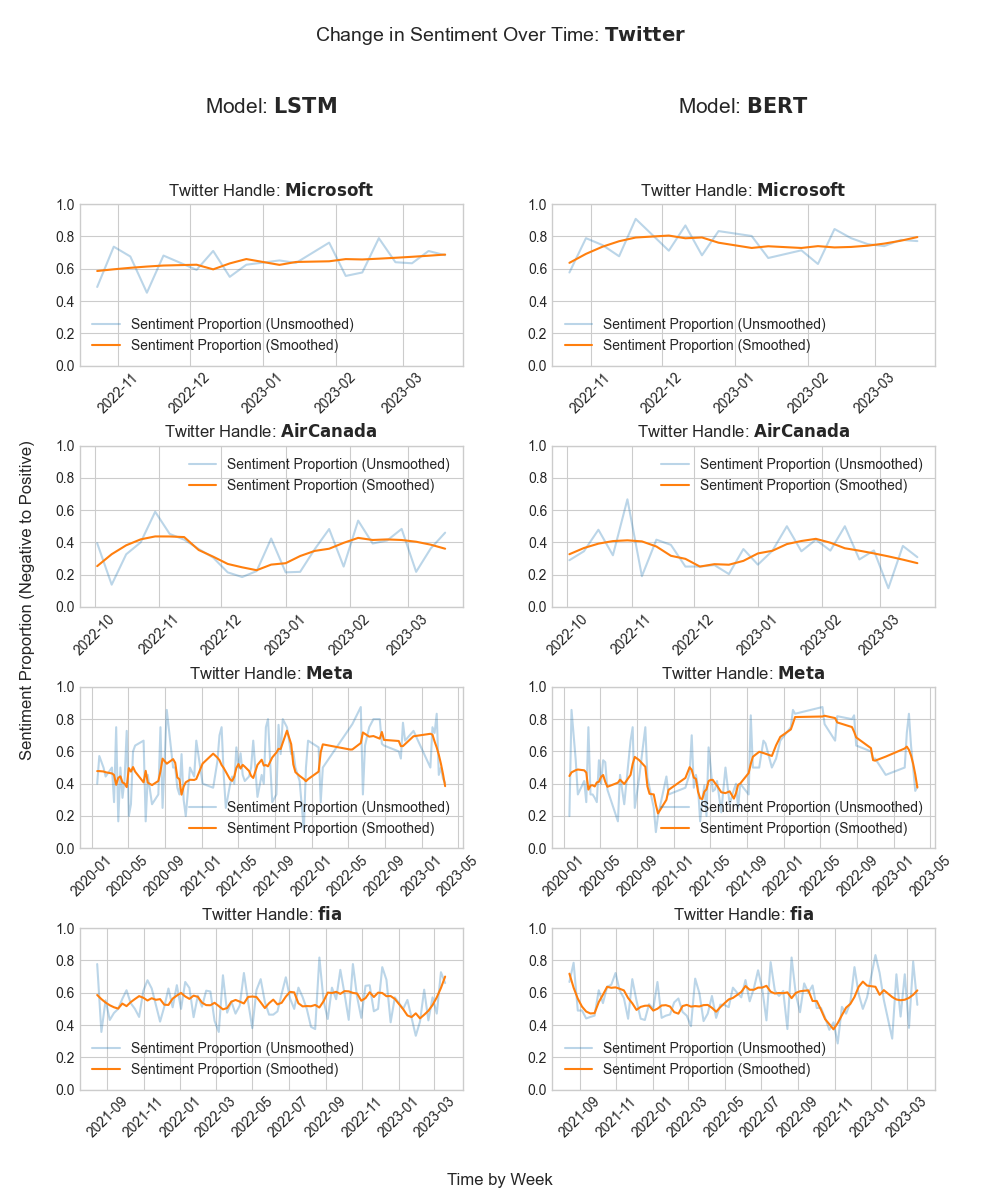

In [14]:
# Timeseries vizualization of both model results on twitter data
os.chdir(f"{working_directory}/result_visualizations")
Image(filename='results/timeseries_distribution_grid.png')

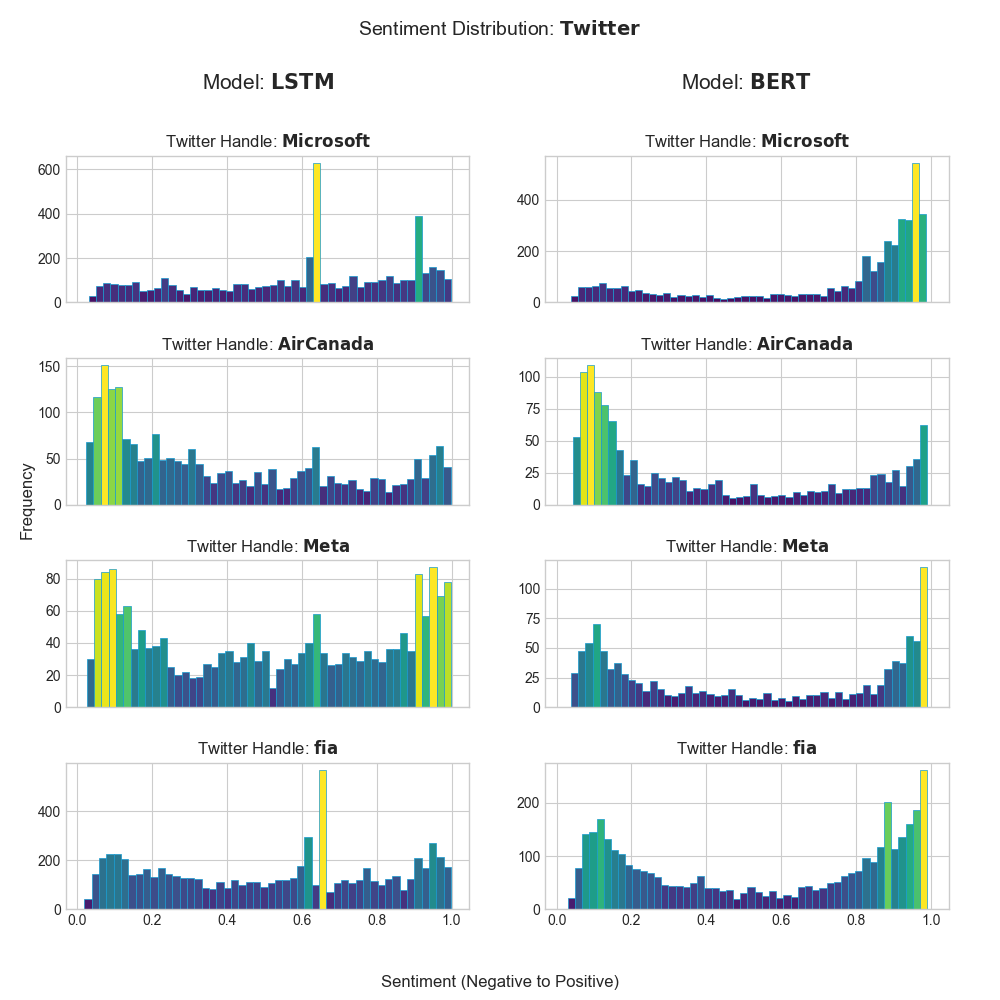

In [15]:
# Distribution vizualization of both model results on twitter data
os.chdir(f"{working_directory}/result_visualizations")
Image(filename='results/distribution_grid.png')

#### New York Time Results

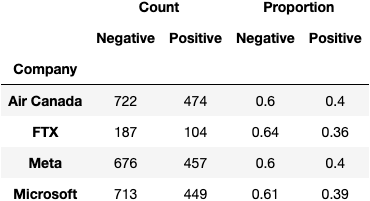

In [16]:
# Initial summary of LSTM model results on NYT data
os.chdir(f"{working_directory}/result_visualizations")
Image(filename='results/lstm_initial_nyt_summary_result.png')

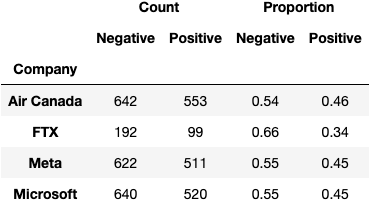

In [17]:
# Initial summary of BERT model results on NYT data
os.chdir(f"{working_directory}/result_visualizations")
Image(filename='results/bert_initial_nyt_summary_result.png')

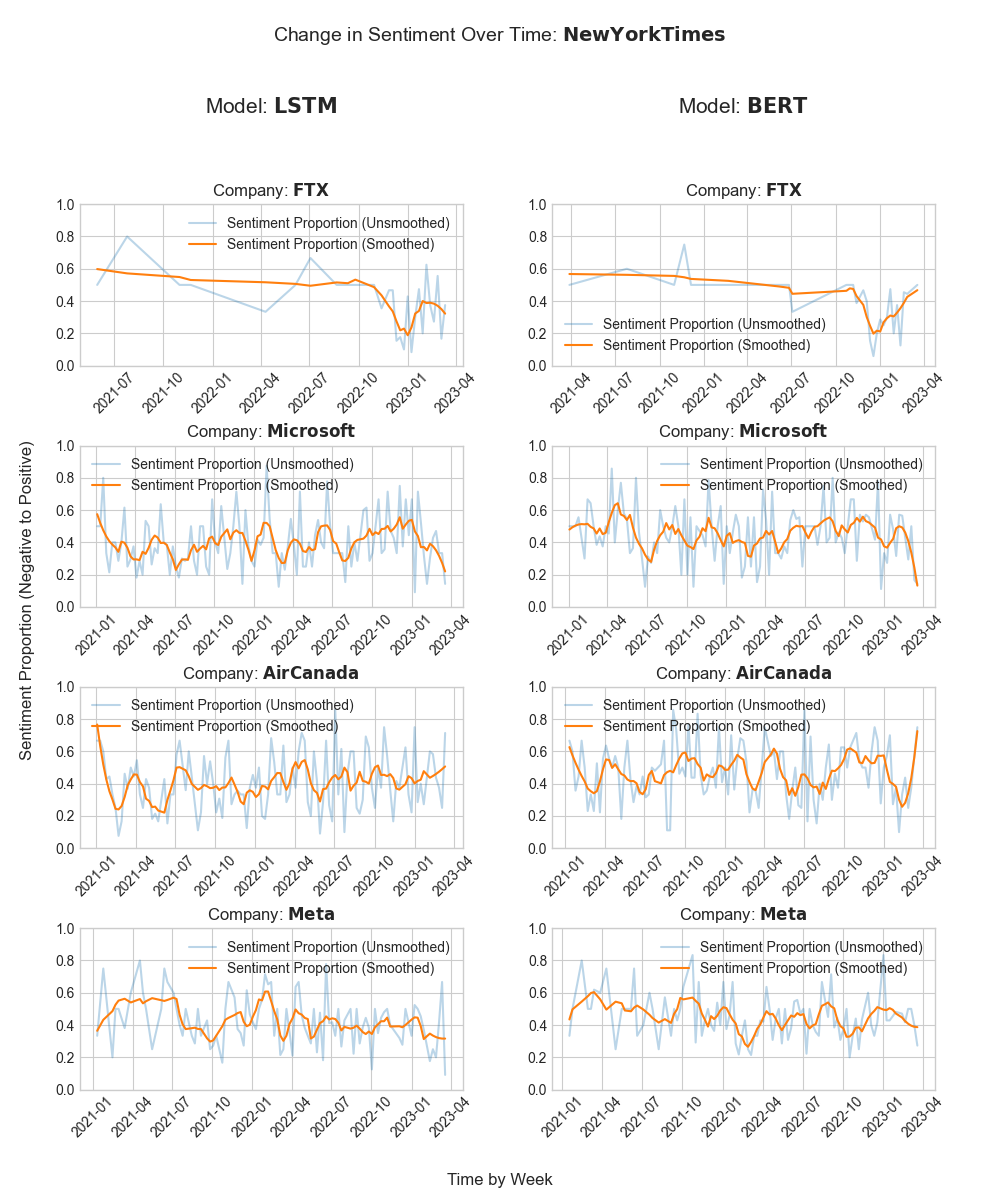

In [19]:
# Timeseries vizualization of both model results on NYT data
os.chdir(f"{working_directory}/result_visualizations")
Image(filename='results/nyt_timeseries_distribution_grid.png')

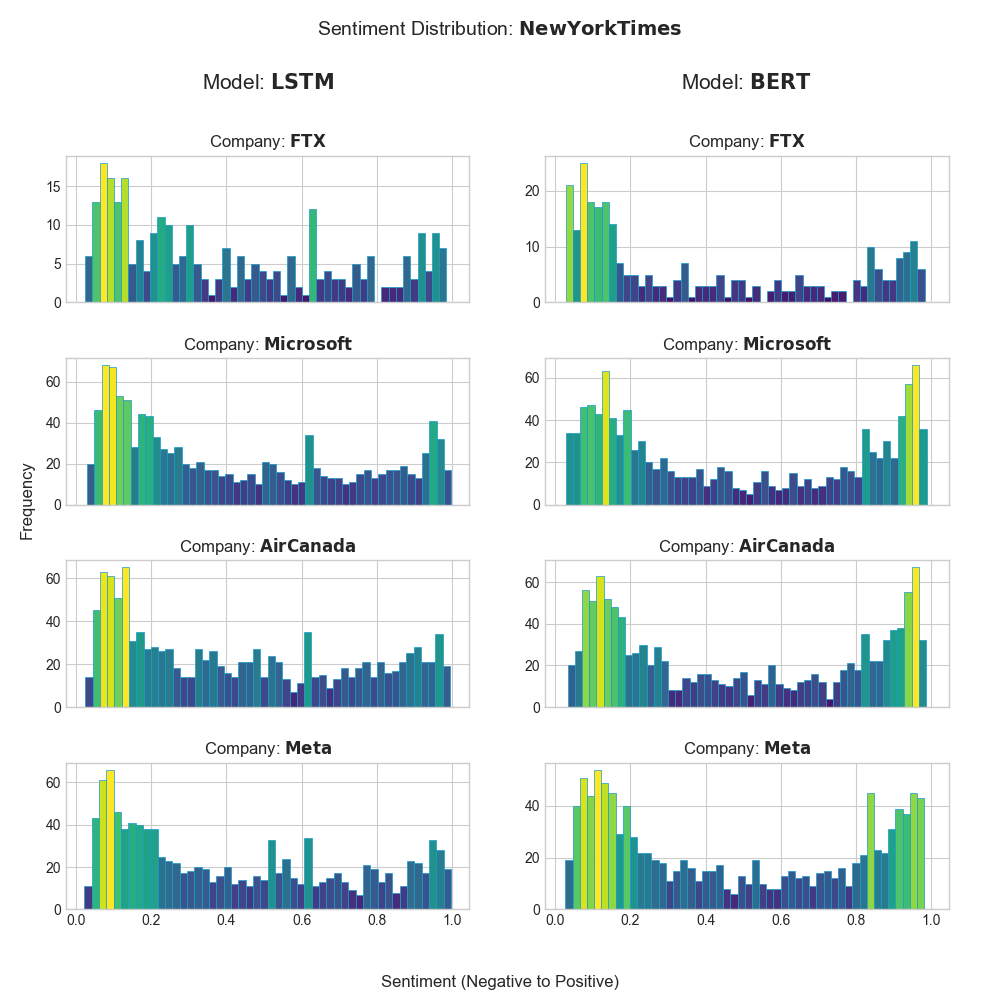

In [18]:
# Distribution vizualization of both model results on NYT data
os.chdir(f"{working_directory}/result_visualizations")
Image(filename='results/nyt_distribution_grid.png')